In [ ]:
install.packages("corrplot",repos='http://cran.us.r-project.org')
install.packages("visreg",repos='http://cran.us.r-project.org')
install.packages("rgl",repos='http://cran.us.r-project.org')
install.packages("scatterplot3d",repos='http://cran.us.r-project.org')
install.packages("car",repos='http://cran.us.r-project.org')
install.packages("knitr",repos='http://cran.us.r-project.org')

In [6]:
library(car)
library(corrplot) 
library(visreg) 
library(rgl)
library(knitr)
library(scatterplot3d)

Warning message:
"package 'car' was built under R version 3.3.3"Warning message:
"package 'corrplot' was built under R version 3.3.3"corrplot 0.84 loaded
Warning message:
"package 'visreg' was built under R version 3.3.3"Warning message:
"package 'rgl' was built under R version 3.3.3"Warning message:
"package 'knitr' was built under R version 3.3.3"Warning message:
"package 'scatterplot3d' was built under R version 3.3.3"

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/shapiro-wilk-test/

In [7]:
head(Prestige)

,education,income,women,prestige,census,type
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof
physicists,15.64,11030,5.13,77.6,2113,prof


In [8]:
newdata <- Prestige[,c(1:4)]
summary(newdata)
str(newdata)

   education          income          women           prestige    
 Min.   : 6.380   Min.   :  611   Min.   : 0.000   Min.   :14.80  
 1st Qu.: 8.445   1st Qu.: 4106   1st Qu.: 3.592   1st Qu.:35.23  
 Median :10.540   Median : 5930   Median :13.600   Median :43.60  
 Mean   :10.738   Mean   : 6798   Mean   :28.979   Mean   :46.83  
 3rd Qu.:12.648   3rd Qu.: 8187   3rd Qu.:52.203   3rd Qu.:59.27  
 Max.   :15.970   Max.   :25879   Max.   :97.510   Max.   :87.20  

'data.frame':	102 obs. of  4 variables:
 $ education: num  13.1 12.3 12.8 11.4 14.6 ...
 $ income   : int  12351 25879 9271 8865 8403 11030 8258 14163 11377 11023 ...
 $ women    : num  11.16 4.02 15.7 9.11 11.68 ...
 $ prestige : num  68.8 69.1 63.4 56.8 73.5 77.6 72.6 78.1 73.1 68.8 ...


In [9]:
?Prestige

In [13]:
sum(is.na(newdata))

[1] 0

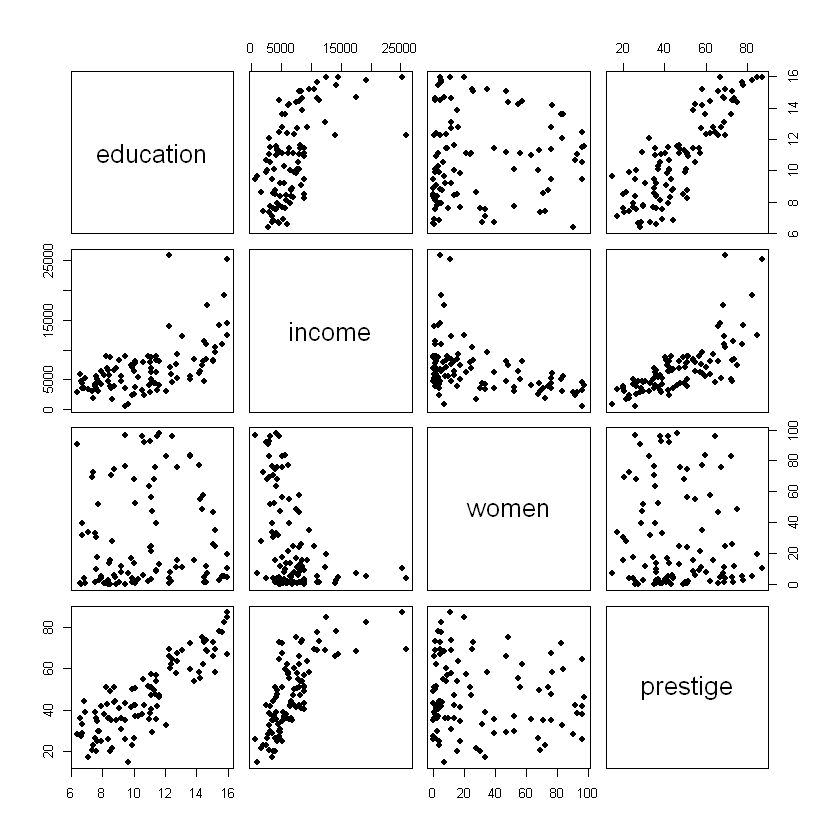

In [17]:
plot(newdata,pch=16)

In [19]:
cor(newdata)

,education,income,women,prestige
education,1.00000000,0.5775802,0.06185286,0.8501769
income,0.57758023,1.0000000,-0.44105927,0.7149057
women,0.06185286,-0.4410593,1.00000000,-0.1183342
prestige,0.85017689,0.7149057,-0.11833419,1.0000000


In [20]:
set.seed(1)

# Center predictors.
education.c <- scale(newdata$education, center=TRUE, scale=FALSE)
prestige.c <- scale(newdata$prestige, center=TRUE, scale=FALSE)
women.c <- scale(newdata$women, center=TRUE, scale=FALSE)

In [21]:
new.c.vars <- cbind(education.c, prestige.c, women.c)
newdata <- cbind(newdata, new.c.vars)
names(newdata)[5:7] <- c("education.c", "prestige.c", "women.c" )
summary(newdata)

   education          income          women           prestige    
 Min.   : 6.380   Min.   :  611   Min.   : 0.000   Min.   :14.80  
 1st Qu.: 8.445   1st Qu.: 4106   1st Qu.: 3.592   1st Qu.:35.23  
 Median :10.540   Median : 5930   Median :13.600   Median :43.60  
 Mean   :10.738   Mean   : 6798   Mean   :28.979   Mean   :46.83  
 3rd Qu.:12.648   3rd Qu.: 8187   3rd Qu.:52.203   3rd Qu.:59.27  
 Max.   :15.970   Max.   :25879   Max.   :97.510   Max.   :87.20  
  education.c       prestige.c         women.c      
 Min.   :-4.358   Min.   :-32.033   Min.   :-28.98  
 1st Qu.:-2.293   1st Qu.:-11.608   1st Qu.:-25.39  
 Median :-0.198   Median : -3.233   Median :-15.38  
 Mean   : 0.000   Mean   :  0.000   Mean   :  0.00  
 3rd Qu.: 1.909   3rd Qu.: 12.442   3rd Qu.: 23.22  
 Max.   : 5.232   Max.   : 40.367   Max.   : 68.53  

In [35]:
# fit a linear model and run a summary of its results.
mod1 <- lm(income ~ education.c + prestige.c + women.c, data=newdata)
summary(mod1)


Call:
lm(formula = income ~ education.c + prestige.c + women.c, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-7715.3  -929.7  -231.2   689.7 14391.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6797.902    254.934  26.665  < 2e-16 ***
education.c  177.199    187.632   0.944    0.347    
prestige.c   141.435     29.910   4.729 7.58e-06 ***
women.c      -50.896      8.556  -5.948 4.19e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2575 on 98 degrees of freedom
Multiple R-squared:  0.6432,	Adjusted R-squared:  0.6323 
F-statistic: 58.89 on 3 and 98 DF,  p-value: < 2.2e-16


# Intercept : 1 unit increase in education there will be 177.199 increase in income

In [40]:
# fit a linear model and run a summary of its results.
mod1 <- lm(income ~ education + prestige + women, data=newdata)
summary(mod1)


Call:
lm(formula = income ~ education + prestige + women, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-7715.3  -929.7  -231.2   689.7 14391.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -253.850   1086.157  -0.234    0.816    
education    177.199    187.632   0.944    0.347    
prestige     141.435     29.910   4.729 7.58e-06 ***
women        -50.896      8.556  -5.948 4.19e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2575 on 98 degrees of freedom
Multiple R-squared:  0.6432,	Adjusted R-squared:  0.6323 
F-statistic: 58.89 on 3 and 98 DF,  p-value: < 2.2e-16


# When do you consider R-squared vs Adjusted R-squared?

### Assignment

In [26]:
mod1 <- lm(income ~ education , data=newdata)
summary(mod1)


Call:
lm(formula = income ~ education, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5493.2 -2433.8   -41.9  1491.5 17713.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2853.6     1407.0  -2.028   0.0452 *  
education      898.8      127.0   7.075 2.08e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3483 on 100 degrees of freedom
Multiple R-squared:  0.3336,	Adjusted R-squared:  0.3269 
F-statistic: 50.06 on 1 and 100 DF,  p-value: 2.079e-10


## Education alone is significant , but Multiple R-Squared has dropped significantly

In [39]:
mod2<- lm(income ~ women + prestige, data=newdata)
summary(mod2)


Call:
lm(formula = income ~ women + prestige, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-7620.9 -1008.7  -240.4   873.1 14180.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  431.574    807.630   0.534    0.594    
women        -48.385      8.128  -5.953 4.02e-08 ***
prestige     165.875     14.988  11.067  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2573 on 99 degrees of freedom
Multiple R-squared:   0.64,	Adjusted R-squared:  0.6327 
F-statistic: 87.98 on 2 and 99 DF,  p-value: < 2.2e-16


## Women, prestige are significant , but Adjusted  R-Squared is 0.6327 

In [33]:
mod1 <- lm(income ~ education  + prestige, data=newdata)
summary(mod1)


Call:
lm(formula = income ~ education + prestige, data = newdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-6649.0 -1453.5   102.4  1234.3 14901.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -714.66    1257.53  -0.568    0.571    
education    -169.63     207.01  -0.819    0.415    
prestige      199.30      32.83   6.071 2.36e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2989 on 99 degrees of freedom
Multiple R-squared:  0.5144,	Adjusted R-squared:  0.5046 
F-statistic: 52.43 on 2 and 99 DF,  p-value: 2.962e-16


## Education, prestige are significant , but Adjusted  R-Squared is  0.5046 

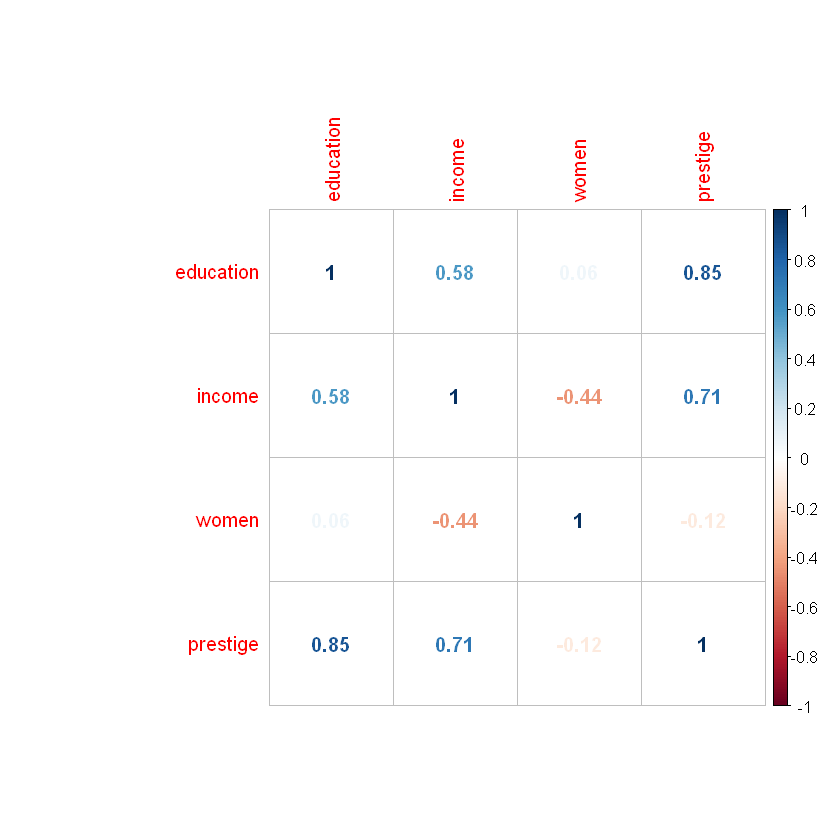

In [41]:
corrplot(cor(newdata[1:4]),method = "number")

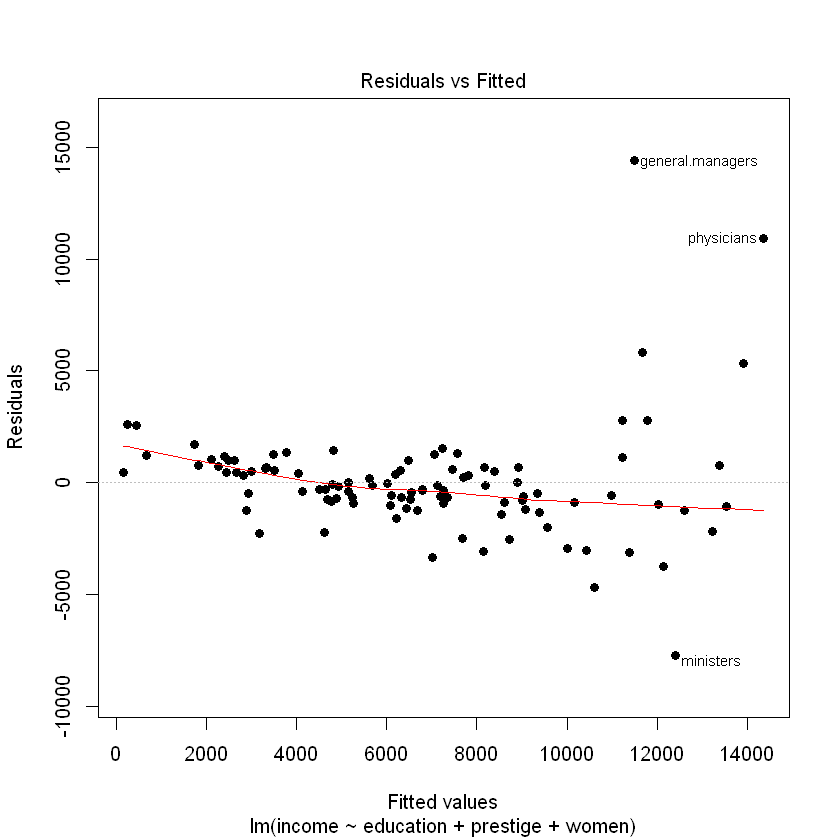

In [42]:
plot(mod1,pch=16,which=1)